<a href="https://colab.research.google.com/github/Shreyashgupta016/My-Projects/blob/main/Delhivery_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_1samp, ttest_ind, ttest_ind_from_stats, f_oneway, kruskal, chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


Data Exploration

In [ ]:
df.shape

(144867, 24)

In [ ]:
df['trip_creation_time']=pd.to_datetime(df['trip_creation_time'])
df['od_start_time']=pd.to_datetime(df['od_start_time'])
df['od_end_time']=pd.to_datetime(df['od_end_time'])

In [ ]:
# Difference between od_start_time and od_end_time
df['od_delivery_time']=(df['od_end_time']-df['od_start_time'])
df['od_delivery_time'].head(10)

0   0 days 01:26:12.818197
1   0 days 01:26:12.818197
2   0 days 01:26:12.818197
3   0 days 01:26:12.818197
4   0 days 01:26:12.818197
5   0 days 01:49:10.390967
6   0 days 01:49:10.390967
7   0 days 01:49:10.390967
8   0 days 01:49:10.390967
9   0 days 01:49:10.390967
Name: od_delivery_time, dtype: timedelta64[ns]

In [ ]:
# Converting the difference between od_start_time and od_end_time into minutes
df['od_delivery_minutes']=pd.to_timedelta(df['od_delivery_time']).astype('timedelta64[m]').astype(float)
df['od_delivery_minutes'].head(10)

0     86.0
1     86.0
2     86.0
3     86.0
4     86.0
5    109.0
6    109.0
7    109.0
8    109.0
9    109.0
Name: od_delivery_minutes, dtype: float64

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,od_delivery_time,od_delivery_minutes
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,0 days 01:26:12.818197,86.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,0 days 01:26:12.818197,86.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,0 days 01:26:12.818197,86.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,0 days 01:26:12.818197,86.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,0 days 01:26:12.818197,86.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   data                            144867 non-null  object         
 1   trip_creation_time              144867 non-null  datetime64[ns] 
 2   route_schedule_uuid             144867 non-null  object         
 3   route_type                      144867 non-null  object         
 4   trip_uuid                       144867 non-null  object         
 5   source_center                   144867 non-null  object         
 6   source_name                     144574 non-null  object         
 7   destination_center              144867 non-null  object         
 8   destination_name                144606 non-null  object         
 9   od_start_time                   144867 non-null  datetime64[ns] 
 10  od_end_time                     144867 non-n

In [ ]:
# Grouping by trip id, source and destination centre to yield the various distances and time taken by a product to move from one centre to another
k = df.groupby(['trip_uuid','source_center','destination_center'],sort=False).agg(od_center_time=('od_delivery_minutes','mean'),
                                                                                  scan_center_time=('start_scan_to_end_scan','mean'),
                                                                                  actual_center_time=('actual_time','last'),
                                                                                  osrm_center_time=('osrm_time','last'),
                                                                                  segment_actual_center_time=('segment_actual_time','sum'),
                                                                                  segment_osrm_center_time=('segment_osrm_time','sum'),
                                                                                  osrm_center_distance=('osrm_distance','last'),
                                                                                  actual_center_distance=('actual_distance_to_destination','last'),
                                                                                  segment_osrm_center_distance=('segment_osrm_distance','sum'))
k

od_center_time  \
trip_uuid               source_center destination_center                   
trip-153741093647649320 IND388121AAA  IND388620AAB                  86.0   
                        IND388620AAB  IND388320AAA                 109.0   
trip-153768492602129387 IND421302AAG  IND411033AAA                 302.0   
trip-153693976643699843 IND400011AAA  IND400072AAD                 108.0   
trip-153687145942424248 IND562132AAA  IND560099AAB                 195.0   
...                                                                  ...   
trip-153799142965708367 IND457226AAA  IND382430AAB                 622.0   
trip-153695073416451616 IND400102AAB  IND421302AAG                 393.0   
trip-153761584139918815 IND421302AAG  IND411033AAA                 614.0   
trip-153718412883843340 IND600056AAB  IND600032AAB                 116.0   
trip-153746066843555182 IND131028AAB  IND000000ACB                 427.0   

                                                          scan_center_time  \
trip_uuid               source_center destination_center                     
trip-153741093647649320 IND388121AAA  IND388620AAB                    86.0   
                        IND388620AAB  IND388320AAA                   109.0   
trip-153768492602129387 IND421302AAG  IND411033AAA                   302.0   
trip-153693976643699843 IND400011AAA  IND400072AAD                   108.0   
trip-153687145942424248 IND562132AAA  IND560099AAB                   195.0   
...                                                                    ...   
trip-153799142965708367 IND457226AAA  IND382430AAB                   622.0   
trip-153695073416451616 IND400102AAB  IND421302AAG                   393.0   
trip-153761584139918815 IND421302AAG  IND411033AAA                   614.0   
trip-153718412883843340 IND600056AAB  IND600032AAB                   116.0   
trip-153746066843555182 IND131028AAB  IND000000ACB                   427.0   

                                                          actual_center_time  \
trip_uuid               source_center destination_center                       
trip-153741093647649320 IND388121AAA  IND388620AAB                      68.0   
                        IND388620AAB  IND388320AAA                     102.0   
trip-153768492602129387 IND421302AAG  IND411033AAA                     183.0   
trip-153693976643699843 IND400011AAA  IND400072AAD                      60.0   
trip-153687145942424248 IND562132AAA  IND560099AAB                      67.0   
...                                                                      ...   
trip-153799142965708367 IND457226AAA  IND382430AAB                     484.0   
trip-153695073416451616 IND400102AAB  IND421302AAG                     344.0   
trip-153761584139918815 IND421302AAG  IND411033AAA                     289.0   
trip-153718412883843340 IND600056AAB  IND600032AAB                      84.0   
trip-153746066843555182 IND131028AAB  IND000000ACB                     426.0   

                                                          osrm_center_time  \
trip_uuid               source_center destination_center                     
trip-153741093647649320 IND388121AAA  IND388620AAB                    44.0   
                        IND388620AAB  IND388320AAA                    45.0   
trip-153768492602129387 IND421302AAG  IND411033AAA                    95.0   
trip-153693976643699843 IND400011AAA  IND400072AAD                    16.0   
trip-153687145942424248 IND562132AAA  IND560099AAB                    53.0   
...                                                                    ...   
trip-153799142965708367 IND457226AAA  IND382430AAB                   290.0   
trip-153695073416451616 IND400102AAB  IND421302AAG                    31.0   
trip-153761584139918815 IND421302AAG  IND411033AAA                    95.0   
trip-153718412883843340 IND600056AAB  IND600032AAB                    33.0   
trip-153746066843555182 IND131028AAB  IND000000ACB                    95.0   

In [ ]:
# Grouping by trip id to yield total distance and time taken by a product to move from source to destination
m = k.groupby('trip_uuid').agg(od_total_time=('od_center_time','sum'),
                               scan_total_time=('scan_center_time','sum'),
                               actual_total_time=('actual_center_time','sum'),
                               osrm_total_time=('osrm_center_time','sum'),
                               segment_actual_total_time=('segment_actual_center_time','sum'),
                               segment_osrm_total_time=('segment_osrm_center_time','sum'),
                               osrm_total_distance=('osrm_center_distance','sum'),
                               actual_total_distance=('actual_center_distance','sum'),
                               segment_osrm_total_distance=('segment_osrm_center_distance','sum'))
m.reset_index(inplace=True)
m

,trip_uuid,od_total_time,scan_total_time,actual_total_time,osrm_total_time,segment_actual_total_time,segment_osrm_total_time,osrm_total_distance,actual_total_distance,segment_osrm_total_distance
0,trip-153741093647649320,195.0,195.0,170.0,89.0,167.0,88.0,107.4515,82.981842,102.7106
1,trip-153768492602129387,302.0,302.0,183.0,95.0,180.0,106.0,129.3519,100.708423,130.4089
2,trip-153693976643699843,108.0,108.0,60.0,16.0,60.0,16.0,18.7941,16.431273,18.7941
3,trip-153687145942424248,1031.0,1031.0,805.0,486.0,799.0,502.0,524.7155,371.458435,560.5092
4,trip-153825970514894360,261.0,261.0,152.0,123.0,151.0,137.0,123.7654,95.488499,115.7501
...,...,...,...,...,...,...,...,...,...,...
14812,trip-153799142965708367,869.0,869.0,625.0,423.0,617.0,507.0,518.8885,377.878467,596.7341
14813,trip-153695073416451616,393.0,393.0,344.0,31.0,344.0,36.0,33.7957,23.034042,40.1360
14814,trip-153761584139918815,614.0,614.0,289.0,95.0,288.0,111.0,129.1588,100.562078,129.3412
14815,trip-153718412883843340,116.0,116.0,84.0,33.0,82.0,31.0,36.7672,31.698687,36.7671


In [ ]:
m.describe()

,od_total_time,scan_total_time,actual_total_time,osrm_total_time,segment_actual_total_time,segment_osrm_total_time,osrm_total_distance,actual_total_distance,segment_osrm_total_distance
count,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000
mean,530.795235,530.795235,357.143754,161.384018,353.892286,180.949787,204.344689,164.477838,223.201161
std,658.676701,658.676701,561.396157,271.360995,556.247965,314.542047,370.395573,305.388147,416.628374
min,23.000000,23.000000,9.000000,6.000000,9.000000,6.000000,9.072900,9.002461,9.072900
25%,149.000000,149.000000,67.000000,29.000000,66.000000,31.000000,30.819200,22.837239,32.654500
50%,280.000000,280.000000,149.000000,60.000000,147.000000,65.000000,65.618800,48.474072,70.154400
75%,637.000000,637.000000,370.000000,168.000000,367.000000,185.000000,208.475000,164.583208,218.802400
max,7898.000000,7898.000000,6265.000000,2032.000000,6230.000000,2564.000000,2840.081000,2186.531787,3523.632400


In [ ]:
# There are 14817 trips in the entire dataset.

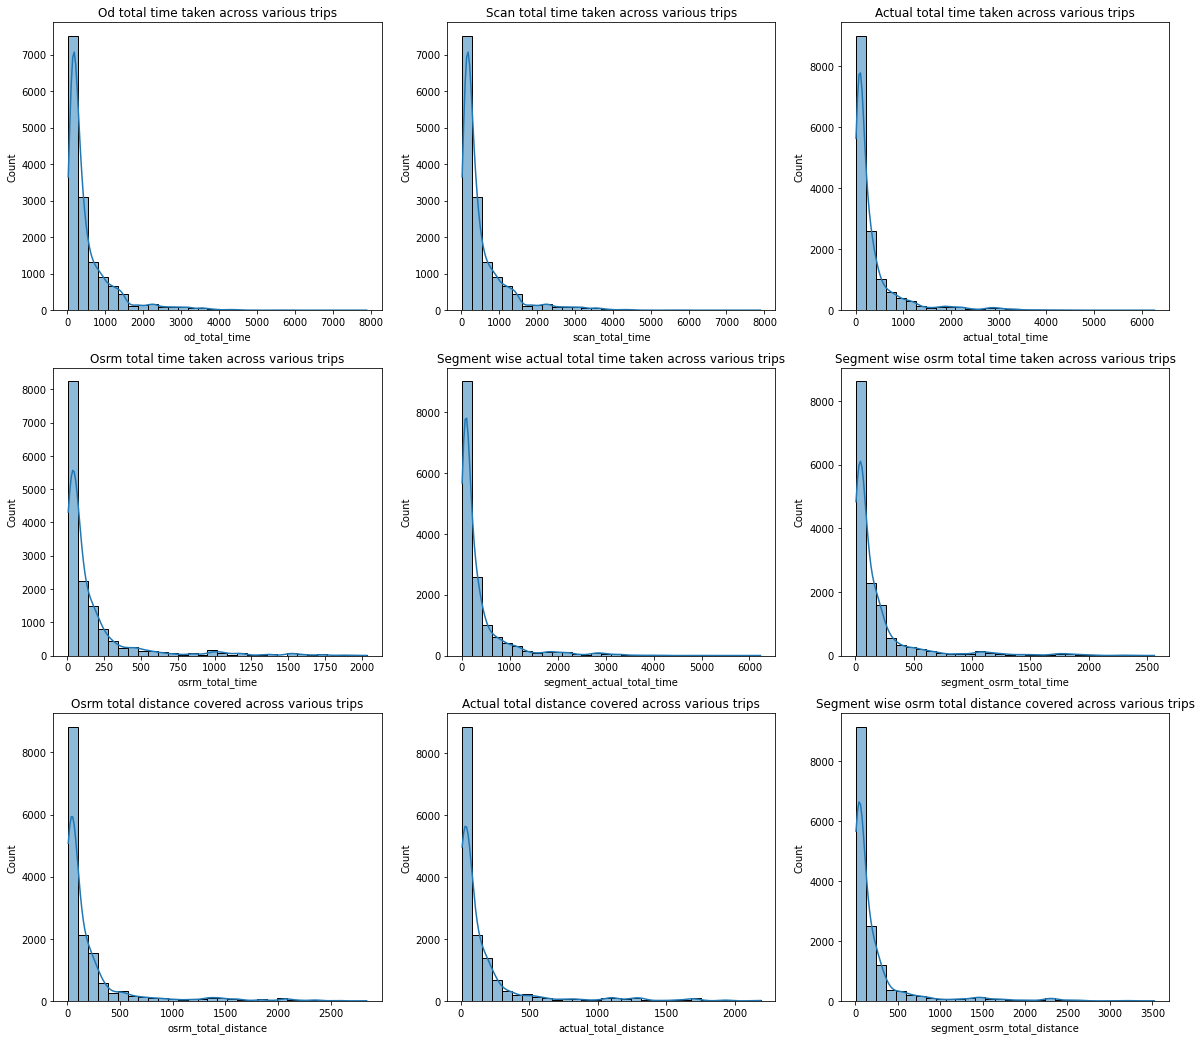

In [ ]:
# Histplot to visualize the distribution of various distances and time taken by every trip id 
plt.figure(figsize=(20,18))

plt.subplot(3,3,1)
sns.histplot(m['od_total_time'], bins=30, kde=True)
plt.title('Od total time taken across various trips')

plt.subplot(3,3,2)
sns.histplot(m['scan_total_time'], bins=30, kde=True)
plt.title('Scan total time taken across various trips')

plt.subplot(3,3,3)
sns.histplot(m['actual_total_time'], bins=30, kde=True)
plt.title('Actual total time taken across various trips')

plt.subplot(3,3,4)
sns.histplot(m['osrm_total_time'], bins=30, kde=True)
plt.title('Osrm total time taken across various trips')

plt.subplot(3,3,5)
sns.histplot(m['segment_actual_total_time'], bins=30, kde=True)
plt.title('Segment wise actual total time taken across various trips')

plt.subplot(3,3,6)
sns.histplot(m['segment_osrm_total_time'], bins=30, kde=True)
plt.title('Segment wise osrm total time taken across various trips')

plt.subplot(3,3,7)
sns.histplot(m['osrm_total_distance'], bins=30, kde=True)
plt.title('Osrm total distance covered across various trips')

plt.subplot(3,3,8)
sns.histplot(m['actual_total_distance'], bins=30, kde=True)
plt.title('Actual total distance covered across various trips')

plt.subplot(3,3,9)
sns.histplot(m['segment_osrm_total_distance'], bins=30, kde=True)
plt.title('Segment wise osrm total distance covered across various trips')

plt.show()

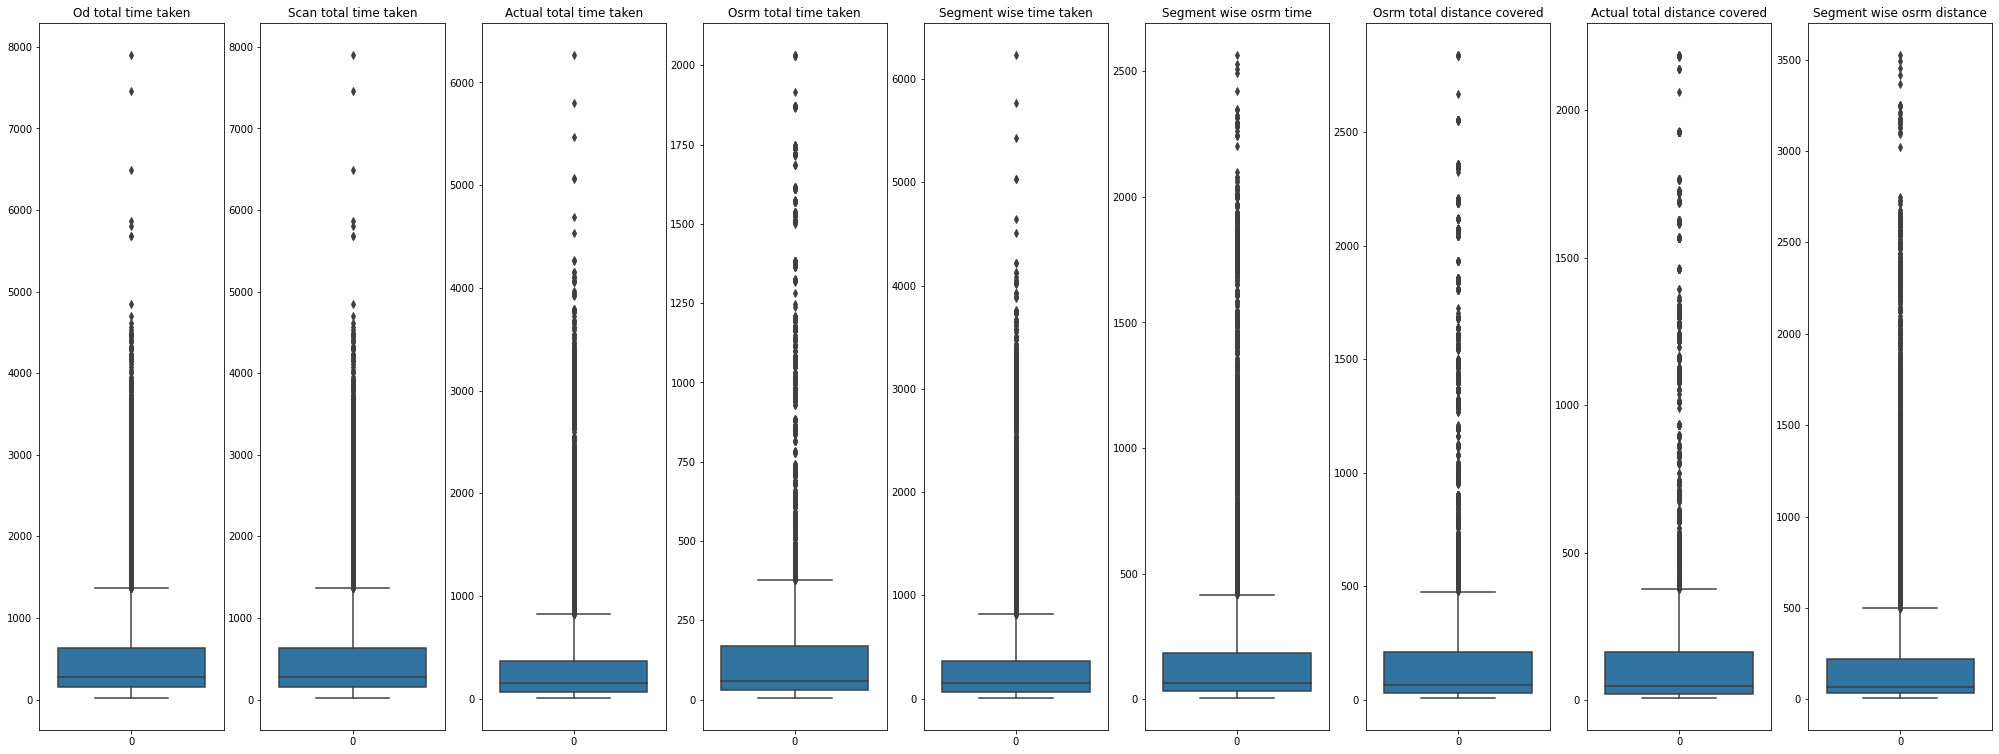

In [ ]:
# Boxplot to visualize the total distance covered and total time taken
plt.figure(figsize=(35,13))

plt.subplot(1,9,1)
sns.boxplot(m['od_total_time'])
plt.title('Od total time taken')

plt.subplot(1,9,2)
sns.boxplot(m['scan_total_time'])
plt.title('Scan total time taken')

plt.subplot(1,9,3)
sns.boxplot(m['actual_total_time'])
plt.title('Actual total time taken')

plt.subplot(1,9,4)
sns.boxplot(m['osrm_total_time'])
plt.title('Osrm total time taken')

plt.subplot(1,9,5)
sns.boxplot(m['segment_actual_total_time'])
plt.title('Segment wise time taken')

plt.subplot(1,9,6)
sns.boxplot(m['segment_osrm_total_time'])
plt.title('Segment wise osrm time')

plt.subplot(1,9,7)
sns.boxplot(m['osrm_total_distance'])
plt.title('Osrm total distance covered')

plt.subplot(1,9,8)
sns.boxplot(m['actual_total_distance'])
plt.title('Actual total distance covered')

plt.subplot(1,9,9)
sns.boxplot(m['segment_osrm_total_distance'])
plt.title('Segment wise osrm distance')

plt.show()

Handling Outliers

In [ ]:
# Inter Quartile Range
IQR_odtt = np.quantile(m['od_total_time'],0.75) - np.quantile(m['od_total_time'],0.25)
IQR_stt = np.quantile(m['scan_total_time'],0.75) - np.quantile(m['scan_total_time'],0.25)
IQR_att = np.quantile(m['actual_total_time'],0.75) - np.quantile(m['actual_total_time'],0.25)
IQR_ostt = np.quantile(m['osrm_total_time'],0.75) - np.quantile(m['osrm_total_time'],0.25)
IQR_satt = np.quantile(m['segment_actual_total_time'],0.75) - np.quantile(m['segment_actual_total_time'],0.25)
IQR_sott = np.quantile(m['segment_osrm_total_time'],0.75) - np.quantile(m['segment_osrm_total_time'],0.25)
IQR_ostd = np.quantile(m['osrm_total_distance'],0.75) - np.quantile(m['osrm_total_distance'],0.25)
IQR_atd = np.quantile(m['actual_total_distance'],0.75) - np.quantile(m['actual_total_distance'],0.25)
IQR_sotd = np.quantile(m['segment_osrm_total_distance'],0.75) - np.quantile(m['segment_osrm_total_distance'],0.25)
print(' IQR_od_total_time_taken:',IQR_odtt,'\n',
      'IQR_scan_total_time_taken:',IQR_stt,'\n',
      'IQR_actual_total_time_taken:',IQR_att,'\n',
      'IQR_osrm_total_time_taken:',IQR_ostt,'\n',
      'IQR_segment_actual_total_time_taken:',IQR_satt,'\n',
      'IQR_segment_osrm_total_time_taken:',IQR_sott,'\n',
      'IQR_osrm_total_distance_covered:',IQR_ostd,'\n',
      'IQR_actual_total_distance_covered:',IQR_atd,'\n',
      'IQR_segment_osrm_total_distance_covered:',IQR_sotd)

 IQR_od_total_time_taken: 488.0 
 IQR_scan_total_time_taken: 488.0 
 IQR_actual_total_time_taken: 303.0 
 IQR_osrm_total_time_taken: 139.0 
 IQR_segment_actual_total_time_taken: 301.0 
 IQR_segment_osrm_total_time_taken: 154.0 
 IQR_osrm_total_distance_covered: 177.6558 
 IQR_actual_total_distance_covered: 141.74596857981817 
 IQR_segment_osrm_total_distance_covered: 186.1479


In [ ]:
m_without_td_outliers = m.loc[(m['actual_total_distance']>=(np.quantile(m['actual_total_distance'],0.25)-1.5*IQR_atd)) & 
      (m['actual_total_distance']<=(np.quantile(m['actual_total_distance'],0.75)+1.5*IQR_atd))]['actual_total_distance']
len(m)-len(m_without_td_outliers)       # number of outliers of actual total distance covered

1449

In [ ]:
m_without_tt_outliers = m.loc[(m['actual_total_time']>=(np.quantile(m['actual_total_time'],0.25)-1.5*IQR_att)) &
      (m['actual_total_time']<=(np.quantile(m['actual_total_time'],0.75)+1.5*IQR_att))]['actual_total_time']
len(m)-len(m_without_tt_outliers)       # number of outliers of actual total time taken

1643

In [ ]:
# The various distances and time taken for every trip are important, therefore we cannot remove the outliers here.

Standardization

In [ ]:
m.head()

,trip_uuid,od_total_time,scan_total_time,actual_total_time,osrm_total_time,segment_actual_total_time,segment_osrm_total_time,osrm_total_distance,actual_total_distance,segment_osrm_total_distance
0,trip-153741093647649320,195.0,195.0,170.0,89.0,167.0,88.0,107.4515,82.981842,102.7106
1,trip-153768492602129387,302.0,302.0,183.0,95.0,180.0,106.0,129.3519,100.708423,130.4089
2,trip-153693976643699843,108.0,108.0,60.0,16.0,60.0,16.0,18.7941,16.431273,18.7941
3,trip-153687145942424248,1031.0,1031.0,805.0,486.0,799.0,502.0,524.7155,371.458435,560.5092
4,trip-153825970514894360,261.0,261.0,152.0,123.0,151.0,137.0,123.7654,95.488499,115.7501


In [ ]:
num_cols = ['od_total_time','scan_total_time','actual_total_time','osrm_total_time',
            'segment_actual_total_time','segment_osrm_total_time','osrm_total_distance','actual_total_distance','segment_osrm_total_distance']

In [ ]:
# Standard Normalization
m_std_scaled=StandardScaler().fit_transform(m[num_cols])
m_std_scaled=pd.DataFrame(m_std_scaled,columns=num_cols)
m_std_scaled

,od_total_time,scan_total_time,actual_total_time,osrm_total_time,segment_actual_total_time,segment_osrm_total_time,osrm_total_distance,actual_total_distance,segment_osrm_total_distance
0,-0.509820,-0.509820,-0.333365,-0.266753,-0.335999,-0.295518,-0.261603,-0.266869,-0.289214
1,-0.347368,-0.347368,-0.310208,-0.244642,-0.312627,-0.238290,-0.202474,-0.208821,-0.222729
2,-0.641907,-0.641907,-0.529312,-0.535777,-0.528365,-0.524430,-0.500969,-0.484798,-0.490639
3,0.759434,0.759434,0.797781,1.196292,0.800224,1.020725,0.864972,0.677785,0.809641
4,-0.409616,-0.409616,-0.365429,-0.141455,-0.364764,-0.139731,-0.217557,-0.225915,-0.257915
...,...,...,...,...,...,...,...,...,...
14812,0.513478,0.513478,0.477141,0.964121,0.473020,1.036622,0.849239,0.698808,0.896592
14813,-0.209207,-0.209207,-0.023413,-0.480498,-0.017785,-0.460844,-0.460466,-0.463176,-0.439412
14814,0.126325,0.126325,-0.121387,-0.244642,-0.118462,-0.222394,-0.202995,-0.209301,-0.225292
14815,-0.629762,-0.629762,-0.486560,-0.473128,-0.488813,-0.476740,-0.452444,-0.434803,-0.447498


In [ ]:
# Correlation between numerical columns for each trip id
m_std_scaled.corr()

,od_total_time,scan_total_time,actual_total_time,osrm_total_time,segment_actual_total_time,segment_osrm_total_time,osrm_total_distance,actual_total_distance,segment_osrm_total_distance
od_total_time,1.000000,1.000000,0.961170,0.926612,0.961189,0.918601,0.924339,0.918347,0.919331
scan_total_time,1.000000,1.000000,0.961170,0.926612,0.961189,0.918601,0.924339,0.918347,0.919331
actual_total_time,0.961170,0.961170,1.000000,0.958593,0.999989,0.953872,0.959214,0.953757,0.956967
osrm_total_time,0.926612,0.926612,0.958593,1.000000,0.957765,0.993259,0.997580,0.993561,0.991608
segment_actual_total_time,0.961189,0.961189,0.999989,0.957765,1.000000,0.953039,0.958353,0.952821,0.956106
segment_osrm_total_time,0.918601,0.918601,0.953872,0.993259,0.953039,1.000000,0.991798,0.987538,0.996092
osrm_total_distance,0.924339,0.924339,0.959214,0.997580,0.958353,0.991798,1.000000,0.997264,0.994710
actual_total_distance,0.918347,0.918347,0.953757,0.993561,0.952821,0.987538,0.997264,1.000000,0.993061
segment_osrm_total_distance,0.919331,0.919331,0.956967,0.991608,0.956106,0.996092,0.994710,0.993061,1.000000


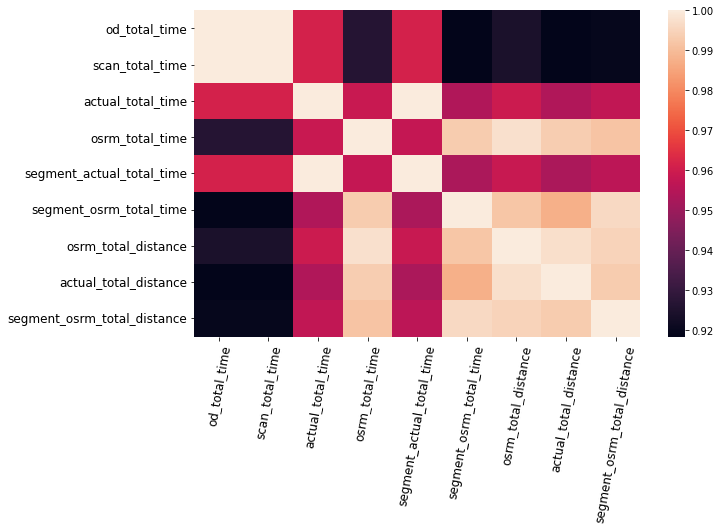

In [ ]:
# Heatmap to visualize the correlation between numerical columns for each trip id
plt.figure(figsize=(10,6))
sns.heatmap(m_std_scaled.corr())
plt.xticks(rotation=80,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

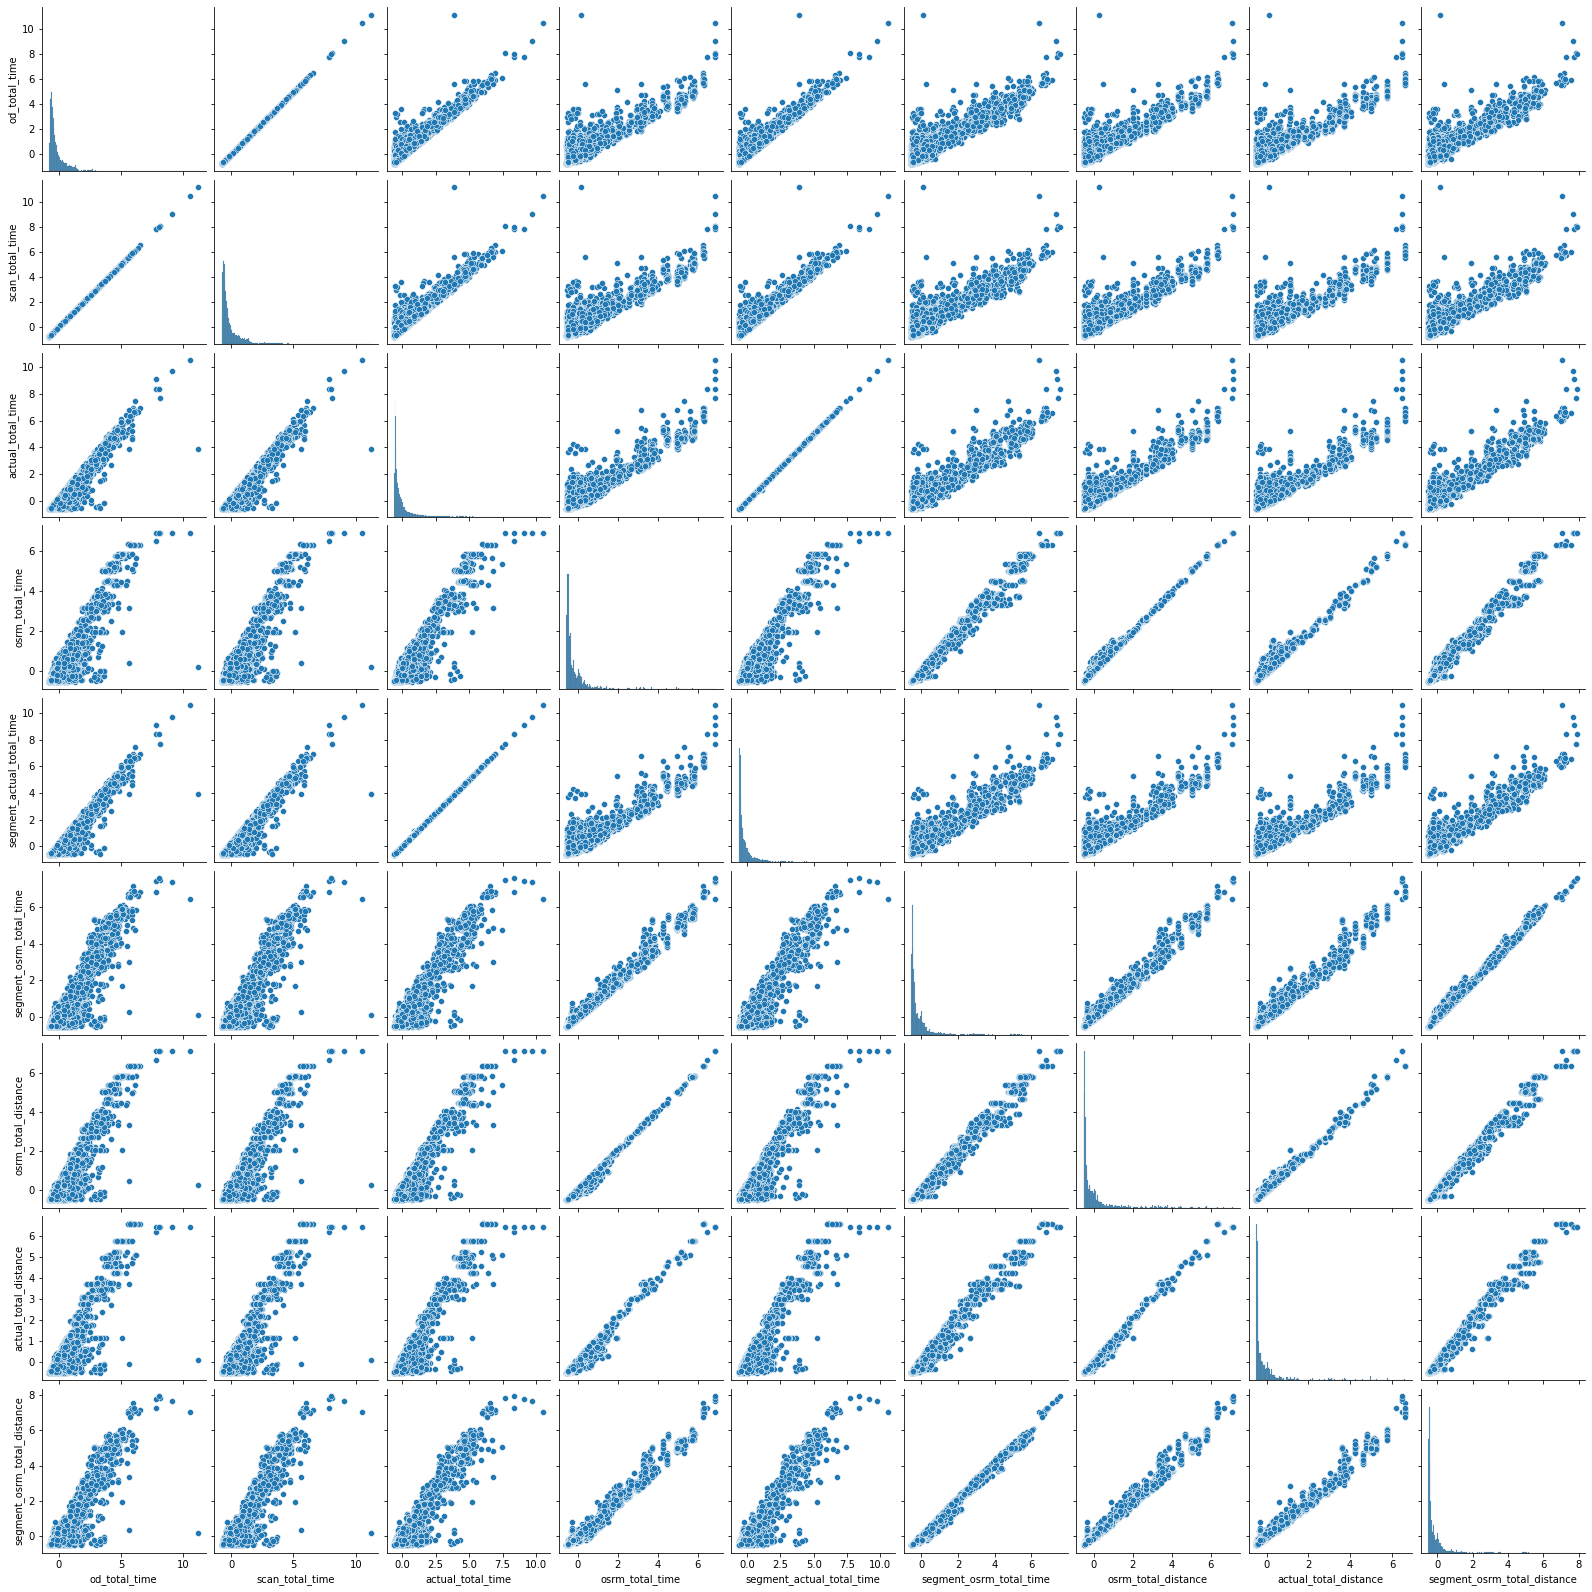

In [ ]:
# Pairplot to visualize the relation between every numerical column for each trip id
sns.pairplot(data=m_std_scaled)

In [ ]:
# MinMax Normalization
m_mm_scaled=MinMaxScaler().fit_transform(m[num_cols])
m_mm_scaled=pd.DataFrame(m_mm_scaled, columns=num_cols)
m_mm_scaled

,od_total_time,scan_total_time,actual_total_time,osrm_total_time,segment_actual_total_time,segment_osrm_total_time,osrm_total_distance,actual_total_distance,segment_osrm_total_distance
0,0.021841,0.021841,0.025735,0.040967,0.025398,0.032056,0.034750,0.033974,0.026643
1,0.035429,0.035429,0.027813,0.043929,0.027488,0.039093,0.042486,0.042115,0.034524
2,0.010794,0.010794,0.008152,0.004936,0.008198,0.003909,0.003434,0.003412,0.002766
3,0.128000,0.128000,0.127238,0.236920,0.126989,0.193901,0.182141,0.166453,0.156901
4,0.030222,0.030222,0.022858,0.057749,0.022826,0.051212,0.040513,0.039718,0.030353
...,...,...,...,...,...,...,...,...,...
14812,0.107429,0.107429,0.098465,0.205824,0.097733,0.195856,0.180083,0.169401,0.167208
14813,0.046984,0.046984,0.053549,0.012340,0.053850,0.011728,0.008733,0.006444,0.008838
14814,0.075048,0.075048,0.044757,0.043929,0.044848,0.041048,0.042418,0.042047,0.034220
14815,0.011810,0.011810,0.011988,0.013327,0.011734,0.009773,0.009782,0.010423,0.007880


Handling null values

In [ ]:
df.isna().sum(axis=0)              # checking null values

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
od_delivery_time                    0
od_delivery_minutes                 0
dtype: int64

In [ ]:
df.loc[df['source_name'].isna()]['source_center'].value_counts()     # source centers with null values

IND282002AAD    128
IND342902A1B     90
IND126116AAA     20
IND509103AAC     17
IND577116AAA     16
IND465333A1B      6
IND841301AAC      5
IND505326AAB      5
IND331022A1B      3
IND852118A1B      3
Name: source_center, dtype: int64

In [ ]:
df.loc[df['destination_name'].isna()]['destination_center'].value_counts()     # destination centers with null values

IND282002AAD    151
IND342902A1B     16
IND577116AAA     16
IND852118A1B     15
IND505326AAB     11
IND126116AAA     10
IND841301AAC      9
IND509103AAC      9
IND250002AAC      9
IND122015AAC      8
IND465333A1B      3
IND331001A1C      3
IND221005A1A      1
Name: destination_center, dtype: int64

In [ ]:
# Since we cannot remove the null values by deleting the rows as all the trips are important, we replaced the null values with the 'Unknown'
df['source_name']=df['source_name'].fillna('Unknown')
df['destination_name']=df['destination_name'].fillna('Unknown')

Feature Engineering

In [ ]:
# Extracting the source and destination states from source and destination names
df['source_state']=df['source_name'].str.extract(r"\(([A-Za-z& ]+)\)", expand=True)
df['destination_state']=df['destination_name'].str.extract(r"\(([A-Za-z& ]+)\)", expand=True)
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,od_delivery_time,od_delivery_minutes,source_state,destination_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,1.272727,14.0,11.0,11.9653,1.272727,0 days 01:26:12.818197,86.0,Gujarat,Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.7243,1.200000,10.0,9.0,9.7590,1.111111,0 days 01:26:12.818197,86.0,Gujarat,Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,32.5395,1.428571,16.0,7.0,10.8152,2.285714,0 days 01:26:12.818197,86.0,Gujarat,Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,45.5620,1.550000,21.0,12.0,13.0224,1.750000,0 days 01:26:12.818197,86.0,Gujarat,Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,54.2181,1.545455,6.0,5.0,3.9153,1.200000,0 days 01:26:12.818197,86.0,Gujarat,Gujarat


In [ ]:
# Replacing NaN values with 'Unknown'
df['source_state']=df['source_state'].fillna('Unknown')
df['destination_state']=df['destination_state'].fillna('Unknown')

In [ ]:
# Grouping by trip id, source state, and destination state to get the total distance and total time for each segment of each trip id across various states
bd=df.groupby(['trip_uuid','source_name','destination_name'],sort=False).agg(total_distance_per_center=('actual_distance_to_destination','last'),
                                                                             total_time_per_center=('actual_time','last'))
bd.reset_index(inplace=True)
bd

,trip_uuid,source_name,destination_name,total_distance_per_center,total_time_per_center
0,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),39.386040,68.0
1,trip-153741093647649320,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),43.595802,102.0
2,trip-153768492602129387,Bhiwandi_Mankoli_HB (Maharashtra),Pune_Tathawde_H (Maharashtra),100.708423,183.0
3,trip-153693976643699843,LowerParel_CP (Maharashtra),Mumbai_Chndivli_PC (Maharashtra),16.431273,60.0
4,trip-153687145942424248,Bangalore_Nelmngla_H (Karnataka),Bengaluru_Bomsndra_HB (Karnataka),39.806036,67.0
...,...,...,...,...,...
26363,trip-153799142965708367,Jaora_RtlamNka_D (Madhya Pradesh),Ahmedabad_East_H_1 (Gujarat),265.367032,484.0
26364,trip-153695073416451616,Mumbai_Jogeshwri_L (Maharashtra),Bhiwandi_Mankoli_HB (Maharashtra),23.034042,344.0
26365,trip-153761584139918815,Bhiwandi_Mankoli_HB (Maharashtra),Pune_Tathawde_H (Maharashtra),100.562078,289.0
26366,trip-153718412883843340,MAA_Poonamallee_HB (Tamil Nadu),Chennai_Hub (Tamil Nadu),31.698687,84.0


In [ ]:
bd['source_state']=bd['source_name'].str.extract(r"\(([A-Za-z& ]+)\)", expand=True)
bd['destination_state']=bd['destination_name'].str.extract(r"\(([A-Za-z& ]+)\)", expand=True)
bd.head()

,trip_uuid,source_name,destination_name,total_distance_per_center,total_time_per_center,source_state,destination_state
0,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),39.386040,68.0,Gujarat,Gujarat
1,trip-153741093647649320,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),43.595802,102.0,Gujarat,Gujarat
2,trip-153768492602129387,Bhiwandi_Mankoli_HB (Maharashtra),Pune_Tathawde_H (Maharashtra),100.708423,183.0,Maharashtra,Maharashtra
3,trip-153693976643699843,LowerParel_CP (Maharashtra),Mumbai_Chndivli_PC (Maharashtra),16.431273,60.0,Maharashtra,Maharashtra
4,trip-153687145942424248,Bangalore_Nelmngla_H (Karnataka),Bengaluru_Bomsndra_HB (Karnataka),39.806036,67.0,Karnataka,Karnataka


In [ ]:
bd['source_state']=bd['source_state'].fillna('Unknown')
bd['destination_state']=bd['destination_state'].fillna('Unknown')

In [ ]:
# Grouping by trip id, source state, and destination state to get the total distance and total time to deliver for each trip id across two states
states_t=bd.groupby(['trip_uuid','source_state','destination_state'],sort=False).agg(total_distance_covered=('total_distance_per_center','sum'),
                                                                total_time_taken=('total_time_per_center','sum'))
states_t.reset_index(inplace=True)
states_t

,trip_uuid,source_state,destination_state,total_distance_covered,total_time_taken
0,trip-153741093647649320,Gujarat,Gujarat,82.981842,170.0
1,trip-153768492602129387,Maharashtra,Maharashtra,100.708423,183.0
2,trip-153693976643699843,Maharashtra,Maharashtra,16.431273,60.0
3,trip-153687145942424248,Karnataka,Karnataka,39.806036,67.0
4,trip-153687145942424248,Karnataka,Kerala,331.652400,738.0
...,...,...,...,...,...
16797,trip-153799142965708367,Madhya Pradesh,Gujarat,265.367032,484.0
16798,trip-153695073416451616,Maharashtra,Maharashtra,23.034042,344.0
16799,trip-153761584139918815,Maharashtra,Maharashtra,100.562078,289.0
16800,trip-153718412883843340,Tamil Nadu,Tamil Nadu,31.698687,84.0


In [ ]:
# States from where most of the orders are taken in descending order
states_t['source_state'].value_counts(normalize=True)*100

Maharashtra               16.646828
Karnataka                 14.420902
Haryana                   11.046304
Tamil Nadu                 6.844423
Uttar Pradesh              5.904059
Telangana                  5.047018
Gujarat                    4.874420
Delhi                      4.719676
West Bengal                4.059041
Punjab                     3.945959
Rajasthan                  3.440067
Andhra Pradesh             3.279372
Madhya Pradesh             2.719914
Bihar                      2.440186
Kerala                     1.904535
Assam                      1.725985
Jharkhand                  1.124866
Uttarakhand                1.083204
Orissa                     1.059398
Chandigarh                 0.952268
Himachal Pradesh           0.851089
Goa                        0.440424
Unknown                    0.392810
Arunachal Pradesh          0.273777
Chhattisgarh               0.255922
Jammu & Kashmir            0.202357
Pondicherry                0.113082
Dadra and Nagar Haveli     0

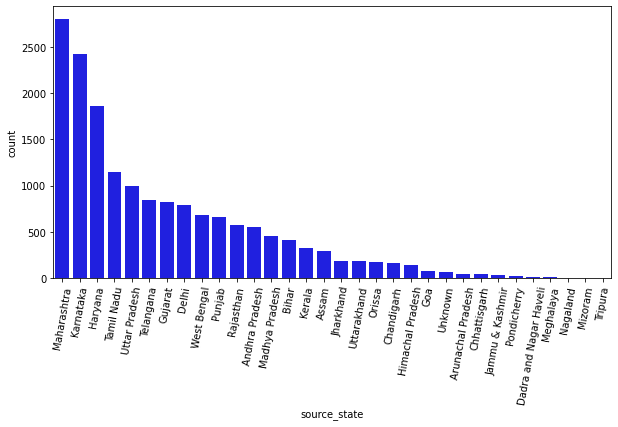

In [ ]:
# Countplot to visualize the states from where the most orders were sourced in descending order
plt.figure(figsize=(10,5))
sns.countplot(x=states_t['source_state'], order=states_t['source_state'].value_counts().index, color='blue')
plt.xticks(rotation=80,fontsize=10)
plt.show()

In [ ]:
# States where most of the orders are delivered in descending order
states_t['destination_state'].value_counts(normalize=True)*100

Maharashtra               16.099274
Karnataka                 14.736341
Haryana                   10.832044
Tamil Nadu                 6.707535
Uttar Pradesh              5.999286
Telangana                  5.386264
Gujarat                    4.874420
Punjab                     4.422093
West Bengal                4.243542
Delhi                      4.017379
Rajasthan                  3.636472
Andhra Pradesh             3.315082
Madhya Pradesh             2.767528
Bihar                      2.410427
Kerala                     1.809308
Assam                      1.618855
Jharkhand                  1.172479
Orissa                     1.130818
Uttarakhand                1.071301
Himachal Pradesh           0.958219
Chandigarh                 0.732056
Unknown                    0.476134
Goa                        0.440424
Arunachal Pradesh          0.309487
Chhattisgarh               0.255922
Jammu & Kashmir            0.190454
Pondicherry                0.142840
Dadra and Nagar Haveli     0

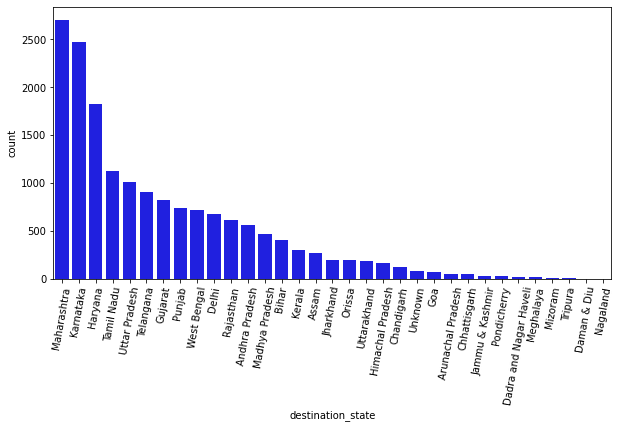

In [ ]:
# Countplot to visualize the states where most orders were delivered in descending order
plt.figure(figsize=(10,5))
sns.countplot(x=states_t['destination_state'], order=states_t['destination_state'].value_counts().index, color='blue')
plt.xticks(rotation=80,fontsize=10)
plt.show()

In [ ]:
# Busiest corridors
states_t[['source_state','destination_state']].value_counts(normalize=True).head(10)*100

source_state   destination_state
Maharashtra    Maharashtra          14.801809
Karnataka      Karnataka            12.671111
Tamil Nadu     Tamil Nadu            6.237353
Haryana        Haryana               4.797048
Gujarat        Gujarat               4.148316
Uttar Pradesh  Uttar Pradesh         4.082847
Telangana      Telangana             4.041186
West Bengal    West Bengal           3.630520
Rajasthan      Rajasthan             2.713963
Delhi          Haryana               2.684204
dtype: float64

In [ ]:
# Non-busy corridors
states_t[['source_state','destination_state']].value_counts().tail(10)

source_state  destination_state
West Bengal   Bihar                1
Mizoram       Assam                1
Punjab        Karnataka            1
Unknown       Delhi                1
Delhi         Assam                1
Punjab        Maharashtra          1
Telangana     Haryana              1
Gujarat       Daman & Diu          1
Tripura       Tripura              1
Assam         Nagaland             1
dtype: int64

In [ ]:
# Grouping by source and destination state to get the mean distance and time to deliver between two states
states_m=states_t.groupby(['source_state','destination_state'],sort=False).agg(mean_distance_covered=('total_distance_covered','mean'),
                                                                mean_time_taken=('total_time_taken','mean'))
states_m.reset_index(inplace=True)
states_m

,source_state,destination_state,mean_distance_covered,mean_time_taken
0,Gujarat,Gujarat,89.161298,181.955524
1,Maharashtra,Maharashtra,63.258607,169.460796
2,Karnataka,Karnataka,56.452877,137.840770
3,Karnataka,Kerala,286.970216,636.900000
4,Punjab,Punjab,124.507781,239.703088
...,...,...,...,...
168,Jharkhand,Uttar Pradesh,690.659744,1002.666667
169,Mizoram,Assam,68.013283,190.000000
170,West Bengal,Bihar,496.415390,692.000000
171,Maharashtra,Punjab,1295.836015,2172.000000


In [ ]:
states_m.sort_values(by=['mean_time_taken','mean_distance_covered']).head(10)

,source_state,destination_state,mean_distance_covered,mean_time_taken
73,Chandigarh,Chandigarh,11.112961,29.076923
100,Gujarat,Dadra and Nagar Haveli,14.408057,34.647059
39,Unknown,Karnataka,33.755083,38.750000
159,Gujarat,Daman & Diu,9.376028,43.000000
88,Dadra and Nagar Haveli,Gujarat,14.349976,48.333333
123,Bihar,Unknown,29.001330,53.916667
38,Karnataka,Unknown,42.301665,54.857143
125,Uttar Pradesh,Rajasthan,34.283767,60.250000
33,Delhi,Delhi,15.837055,63.031746
64,Punjab,Chandigarh,35.690464,68.785714


In [ ]:
states_m.sort_values(by=['mean_time_taken','mean_distance_covered'], ascending=False).head(10)

,source_state,destination_state,mean_distance_covered,mean_time_taken
165,Punjab,Karnataka,1927.447705,3784.000000
136,Assam,Delhi,1463.115839,3370.294118
141,Delhi,Assam,1461.480857,3306.000000
164,West Bengal,Maharashtra,1628.663803,3169.400000
103,Haryana,Tamil Nadu,1721.280753,3117.642857
155,Karnataka,West Bengal,1566.480647,3042.666667
139,Maharashtra,West Bengal,1628.807438,2929.555556
34,Haryana,Karnataka,1689.772879,2895.803030
140,Punjab,Maharashtra,1295.867861,2891.000000
65,Karnataka,Haryana,1689.623501,2797.000000


In [ ]:
df['trip_creation_year']=df['trip_creation_time'].dt.year
df['trip_creation_month']=df['trip_creation_time'].dt.month
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,od_delivery_time,od_delivery_minutes,source_state,destination_state,trip_creation_year,trip_creation_month
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,1.272727,0 days 01:26:12.818197,86.0,Gujarat,Gujarat,2018,9
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.0,9.0,9.7590,1.111111,0 days 01:26:12.818197,86.0,Gujarat,Gujarat,2018,9
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,16.0,7.0,10.8152,2.285714,0 days 01:26:12.818197,86.0,Gujarat,Gujarat,2018,9
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.0,12.0,13.0224,1.750000,0 days 01:26:12.818197,86.0,Gujarat,Gujarat,2018,9
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,6.0,5.0,3.9153,1.200000,0 days 01:26:12.818197,86.0,Gujarat,Gujarat,2018,9


In [ ]:
df['trip_creation_year'].unique()

array([2018])

In [ ]:
df['trip_creation_month'].unique()

array([ 9, 10])

Encoding categorical variables

In [ ]:
df['route_type'].value_counts()

FTL        99660
Carting    45207
Name: route_type, dtype: int64

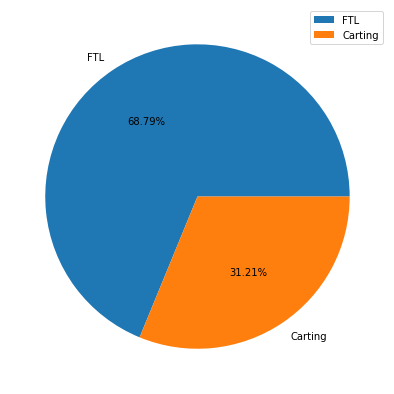

In [ ]:
# Pieplot to visualize the proportion of various route types
plt.figure(figsize=(7,7))
plt.pie(df['route_type'].value_counts(), 
        labels=df['route_type'].value_counts().index, 
        autopct='%1.2f%%')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Performing one hot encoding on route type
df1=pd.get_dummies(df,columns=['route_type'])

In [ ]:
df1.head()

,data,trip_creation_time,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,segment_osrm_distance,segment_factor,od_delivery_time,od_delivery_minutes,source_state,destination_state,trip_creation_year,trip_creation_month,route_type_Carting,route_type_FTL
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,11.9653,1.272727,0 days 01:26:12.818197,86.0,Gujarat,Gujarat,2018,9,1,0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,9.7590,1.111111,0 days 01:26:12.818197,86.0,Gujarat,Gujarat,2018,9,1,0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,10.8152,2.285714,0 days 01:26:12.818197,86.0,Gujarat,Gujarat,2018,9,1,0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,13.0224,1.750000,0 days 01:26:12.818197,86.0,Gujarat,Gujarat,2018,9,1,0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,3.9153,1.200000,0 days 01:26:12.818197,86.0,Gujarat,Gujarat,2018,9,1,0


In [ ]:
jj1=df1.groupby(['trip_uuid','source_center','destination_center'],sort=False).agg(actual_center_distance=('actual_distance_to_destination','last'),
                                                                   actual_center_time=('actual_time','last'),
                                                                   route_Carting=('route_type_Carting','max'),
                                                                   route_FTL=('route_type_FTL','max'))
jj1

actual_center_distance  \
trip_uuid               source_center destination_center                           
trip-153741093647649320 IND388121AAA  IND388620AAB                     39.386040   
                        IND388620AAB  IND388320AAA                     43.595802   
trip-153768492602129387 IND421302AAG  IND411033AAA                    100.708423   
trip-153693976643699843 IND400011AAA  IND400072AAD                     16.431273   
trip-153687145942424248 IND562132AAA  IND560099AAB                     39.806036   
...                                                                          ...   
trip-153799142965708367 IND457226AAA  IND382430AAB                    265.367032   
trip-153695073416451616 IND400102AAB  IND421302AAG                     23.034042   
trip-153761584139918815 IND421302AAG  IND411033AAA                    100.562078   
trip-153718412883843340 IND600056AAB  IND600032AAB                     31.698687   
trip-153746066843555182 IND131028AAB  IND000000ACB                     70.039010   

                                                          actual_center_time  \
trip_uuid               source_center destination_center                       
trip-153741093647649320 IND388121AAA  IND388620AAB                      68.0   
                        IND388620AAB  IND388320AAA                     102.0   
trip-153768492602129387 IND421302AAG  IND411033AAA                     183.0   
trip-153693976643699843 IND400011AAA  IND400072AAD                      60.0   
trip-153687145942424248 IND562132AAA  IND560099AAB                      67.0   
...                                                                      ...   
trip-153799142965708367 IND457226AAA  IND382430AAB                     484.0   
trip-153695073416451616 IND400102AAB  IND421302AAG                     344.0   
trip-153761584139918815 IND421302AAG  IND411033AAA                     289.0   
trip-153718412883843340 IND600056AAB  IND600032AAB                      84.0   
trip-153746066843555182 IND131028AAB  IND000000ACB                     426.0   

                                                          route_Carting  \
trip_uuid               source_center destination_center                  
trip-153741093647649320 IND388121AAA  IND388620AAB                    1   
                        IND388620AAB  IND388320AAA                    1   
trip-153768492602129387 IND421302AAG  IND411033AAA                    0   
trip-153693976643699843 IND400011AAA  IND400072AAD                    1   
trip-153687145942424248 IND562132AAA  IND560099AAB                    0   
...                                                                 ...   
trip-153799142965708367 IND457226AAA  IND382430AAB                    0   
trip-153695073416451616 IND400102AAB  IND421302AAG                    1   
trip-153761584139918815 IND421302AAG  IND411033AAA                    0   
trip-153718412883843340 IND600056AAB  IND600032AAB                    1   
trip-153746066843555182 IND131028AAB  IND000000ACB                    1   

                                                          route_FTL  
trip_uuid               source_center destination_center             
trip-153741093647649320 IND388121AAA  IND388620AAB                0  
                        IND388620AAB  IND388320AAA                0  
trip-153768492602129387 IND421302AAG  IND411033AAA                1  
trip-153693976643699843 IND400011AAA  IND400072AAD                0  
trip-153687145942424248 IND562132AAA  IND560099AAB                1  
...                                                             ...  
trip-153799142965708367 IND457226AAA  IND382430AAB                1  
trip-153695073416451616 IND400102AAB  IND421302AAG                0  
trip-153761584139918815 IND421302AAG  IND411033AAA                1  
trip-153718412883843340 IND600056AAB  IND600032AAB                0  
trip-153746066843555182 IND131028AAB  IND000000ACB                0  

[26368 rows x 4 columns]

In [ ]:
jj2=jj1.groupby('trip_uuid',sort=False).agg(actual_total_distance=('actual_center_distance','sum'),
                                            actual_total_time=('actual_center_time','sum'),
                                            route_Carting=('route_Carting','max'),                    
                                            route_FTL=('route_FTL','max'))
jj2

,actual_total_distance,actual_total_time,route_Carting,route_FTL
trip_uuid,,,,
trip-153741093647649320,82.981842,170.0,1,0
trip-153768492602129387,100.708423,183.0,0,1
trip-153693976643699843,16.431273,60.0,1,0
trip-153687145942424248,371.458435,805.0,0,1
trip-153825970514894360,95.488499,152.0,0,1
...,...,...,...,...
trip-153799142965708367,377.878467,625.0,0,1
trip-153695073416451616,23.034042,344.0,1,0
trip-153761584139918815,100.562078,289.0,0,1


In [ ]:
print('Mean distance covered through Carting:',jj2.loc[jj2['route_Carting']==1]['actual_total_distance'].mean().round(2),'kms')
print('Mean time covered through Carting:',jj2.loc[jj2['route_Carting']==1]['actual_total_time'].mean().round(2),'mins')
print('Average speed through Carting:', 
      round(jj2.loc[jj2['route_Carting']==1]['actual_total_distance'].mean()/(jj2.loc[jj2['route_Carting']==1]['actual_total_time'].mean()/60),2), 'km/hr')
print('-'*60)
print('Mean distance covered through FTL:',jj2.loc[jj2['route_FTL']==1]['actual_total_distance'].mean().round(2),'kms')
print('Mean time covered through FTL:',jj2.loc[jj2['route_FTL']==1]['actual_total_time'].mean().round(2),'mins')
print('Average speed through FTL:', 
      round(jj2.loc[jj2['route_FTL']==1]['actual_total_distance'].mean()/(jj2.loc[jj2['route_FTL']==1]['actual_total_time'].mean()/60),2), 'km/hr')

Mean distance covered through Carting: 40.32 kms
Mean time covered through Carting: 125.8 mins
Average speed through Carting: 19.23 km/hr
------------------------------------------------------------
Mean distance covered through FTL: 351.65 kms
Mean time covered through FTL: 705.9 mins
Average speed through FTL: 29.89 km/hr


In [ ]:
df['trip_creation_month'].value_counts()

9     127349
10     17518
Name: trip_creation_month, dtype: int64

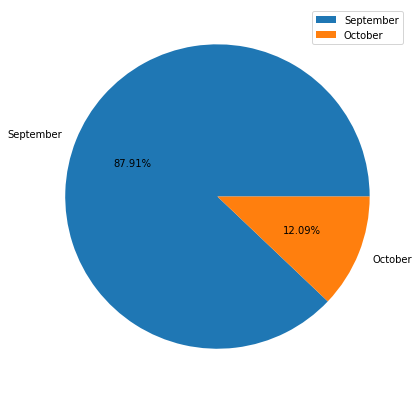

In [ ]:
# Pieplot to visualize the proportion of various months in the dataset
plt.figure(figsize=(7,7))
plt.pie(df['trip_creation_month'].value_counts(), 
        labels=['September','October'], 
        autopct='%1.2f%%')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Performing one hot encoding on trip creation month
df2=pd.get_dummies(df, columns=['trip_creation_month'])

In [ ]:
df2.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_time,segment_osrm_distance,segment_factor,od_delivery_time,od_delivery_minutes,source_state,destination_state,trip_creation_year,trip_creation_month_9,trip_creation_month_10
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.0,11.9653,1.272727,0 days 01:26:12.818197,86.0,Gujarat,Gujarat,2018,1,0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,9.0,9.7590,1.111111,0 days 01:26:12.818197,86.0,Gujarat,Gujarat,2018,1,0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,7.0,10.8152,2.285714,0 days 01:26:12.818197,86.0,Gujarat,Gujarat,2018,1,0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,12.0,13.0224,1.750000,0 days 01:26:12.818197,86.0,Gujarat,Gujarat,2018,1,0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,5.0,3.9153,1.200000,0 days 01:26:12.818197,86.0,Gujarat,Gujarat,2018,1,0


In [ ]:
hh1=df2.groupby(['trip_uuid','source_center','destination_center'],sort=False).agg(actual_center_distance=('actual_distance_to_destination','last'),
                                                                   actual_center_time=('actual_time','last'),
                                                                   September_trip_created=('trip_creation_month_9','mean'),
                                                                   October_trip_created=('trip_creation_month_10','mean'))
hh1

actual_center_distance  \
trip_uuid               source_center destination_center                           
trip-153741093647649320 IND388121AAA  IND388620AAB                     39.386040   
                        IND388620AAB  IND388320AAA                     43.595802   
trip-153768492602129387 IND421302AAG  IND411033AAA                    100.708423   
trip-153693976643699843 IND400011AAA  IND400072AAD                     16.431273   
trip-153687145942424248 IND562132AAA  IND560099AAB                     39.806036   
...                                                                          ...   
trip-153799142965708367 IND457226AAA  IND382430AAB                    265.367032   
trip-153695073416451616 IND400102AAB  IND421302AAG                     23.034042   
trip-153761584139918815 IND421302AAG  IND411033AAA                    100.562078   
trip-153718412883843340 IND600056AAB  IND600032AAB                     31.698687   
trip-153746066843555182 IND131028AAB  IND000000ACB                     70.039010   

                                                          actual_center_time  \
trip_uuid               source_center destination_center                       
trip-153741093647649320 IND388121AAA  IND388620AAB                      68.0   
                        IND388620AAB  IND388320AAA                     102.0   
trip-153768492602129387 IND421302AAG  IND411033AAA                     183.0   
trip-153693976643699843 IND400011AAA  IND400072AAD                      60.0   
trip-153687145942424248 IND562132AAA  IND560099AAB                      67.0   
...                                                                      ...   
trip-153799142965708367 IND457226AAA  IND382430AAB                     484.0   
trip-153695073416451616 IND400102AAB  IND421302AAG                     344.0   
trip-153761584139918815 IND421302AAG  IND411033AAA                     289.0   
trip-153718412883843340 IND600056AAB  IND600032AAB                      84.0   
trip-153746066843555182 IND131028AAB  IND000000ACB                     426.0   

                                                          September_trip_created  \
trip_uuid               source_center destination_center                           
trip-153741093647649320 IND388121AAA  IND388620AAB                           1.0   
                        IND388620AAB  IND388320AAA                           1.0   
trip-153768492602129387 IND421302AAG  IND411033AAA                           1.0   
trip-153693976643699843 IND400011AAA  IND400072AAD                           1.0   
trip-153687145942424248 IND562132AAA  IND560099AAB                           1.0   
...                                                                          ...   
trip-153799142965708367 IND457226AAA  IND382430AAB                           1.0   
trip-153695073416451616 IND400102AAB  IND421302AAG                           1.0   
trip-153761584139918815 IND421302AAG  IND411033AAA                           1.0   
trip-153718412883843340 IND600056AAB  IND600032AAB                           1.0   
trip-153746066843555182 IND131028AAB  IND000000ACB                           1.0   

                                                          October_trip_created  
trip_uuid               source_center destination_center                        
trip-153741093647649320 IND388121AAA  IND388620AAB                         0.0  
                        IND388620AAB  IND388320AAA                         0.0  
trip-153768492602129387 IND421302AAG  IND411033AAA                         0.0  
trip-153693976643699843 IND400011AAA  IND400072AAD                         0.0  
trip-153687145942424248 IND562132AAA  IND560099AAB                         0.0  
...                                                                        ...  
trip-153799142965708367 IND457226AAA  IND382430AAB                         0.0  
trip-153695073416451616 IND400102AAB  IND421302AAG                         0.0  
trip-1537615841399188

In [ ]:
hh2=hh1.groupby('trip_uuid',sort=False).agg(actual_total_distance=('actual_center_distance','sum'),
                                            actual_total_time=('actual_center_time','sum'),
                                            September_trip_created=('September_trip_created','mean'),                    
                                            October_trip_created=('October_trip_created','mean'))
hh2

,actual_total_distance,actual_total_time,September_trip_created,October_trip_created
trip_uuid,,,,
trip-153741093647649320,82.981842,170.0,1.0,0.0
trip-153768492602129387,100.708423,183.0,1.0,0.0
trip-153693976643699843,16.431273,60.0,1.0,0.0
trip-153687145942424248,371.458435,805.0,1.0,0.0
trip-153825970514894360,95.488499,152.0,1.0,0.0
...,...,...,...,...
trip-153799142965708367,377.878467,625.0,1.0,0.0
trip-153695073416451616,23.034042,344.0,1.0,0.0
trip-153761584139918815,100.562078,289.0,1.0,0.0


In [ ]:
print('Mean time taken in September:',hh2.loc[hh2['September_trip_created']==1]['actual_total_time'].mean().round(2),'mins')
print('Mean time taken in October:',hh2.loc[hh2['October_trip_created']==1]['actual_total_time'].mean().round(2),'mins')

Mean time taken in September: 358.45 mins
Mean time taken in October: 347.65 mins


Hypothesis testing with significance level = 0.05 at 95% confidence interval

In [ ]:
m

,trip_uuid,od_total_time,scan_total_time,actual_total_time,osrm_total_time,segment_actual_total_time,segment_osrm_total_time,osrm_total_distance,actual_total_distance,segment_osrm_total_distance
0,trip-153741093647649320,195.0,195.0,170.0,89.0,167.0,88.0,107.4515,82.981842,102.7106
1,trip-153768492602129387,302.0,302.0,183.0,95.0,180.0,106.0,129.3519,100.708423,130.4089
2,trip-153693976643699843,108.0,108.0,60.0,16.0,60.0,16.0,18.7941,16.431273,18.7941
3,trip-153687145942424248,1031.0,1031.0,805.0,486.0,799.0,502.0,524.7155,371.458435,560.5092
4,trip-153825970514894360,261.0,261.0,152.0,123.0,151.0,137.0,123.7654,95.488499,115.7501
...,...,...,...,...,...,...,...,...,...,...
14812,trip-153799142965708367,869.0,869.0,625.0,423.0,617.0,507.0,518.8885,377.878467,596.7341
14813,trip-153695073416451616,393.0,393.0,344.0,31.0,344.0,36.0,33.7957,23.034042,40.1360
14814,trip-153761584139918815,614.0,614.0,289.0,95.0,288.0,111.0,129.1588,100.562078,129.3412
14815,trip-153718412883843340,116.0,116.0,84.0,33.0,82.0,31.0,36.7672,31.698687,36.7671


In [ ]:
m.describe()

,od_total_time,scan_total_time,actual_total_time,osrm_total_time,segment_actual_total_time,segment_osrm_total_time,osrm_total_distance,actual_total_distance,segment_osrm_total_distance
count,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000
mean,530.795235,530.795235,357.143754,161.384018,353.892286,180.949787,204.344689,164.477838,223.201161
std,658.676701,658.676701,561.396157,271.360995,556.247965,314.542047,370.395573,305.388147,416.628374
min,23.000000,23.000000,9.000000,6.000000,9.000000,6.000000,9.072900,9.002461,9.072900
25%,149.000000,149.000000,67.000000,29.000000,66.000000,31.000000,30.819200,22.837239,32.654500
50%,280.000000,280.000000,149.000000,60.000000,147.000000,65.000000,65.618800,48.474072,70.154400
75%,637.000000,637.000000,370.000000,168.000000,367.000000,185.000000,208.475000,164.583208,218.802400
max,7898.000000,7898.000000,6265.000000,2032.000000,6230.000000,2564.000000,2840.081000,2186.531787,3523.632400


In [ ]:
# Is there a statistical difference between the documented trip time and the scan time?
# To find out, we'll perform a ztest on both the sets.

# H0 (Null hypothesis): There is no difference between the two time differences (mu1 = mu2).
# Ha (Alternate hypothesis): There is a difference between the two time differences (mu1 != mu2).

z_stat, p_value = ztest(m['od_total_time'], m['scan_total_time'])
print('Test statistic:', z_stat)
print('p value:', p_value)
if p_value < 0.05:
  print('Reject H0, which means that there is a difference between documented trip time and scan time')
else:
  print('Fail to reject H0, which means that there is no difference between documented trip time and scan time')

Test statistic: 0.0
p value: 1.0
Fail to reject H0, which means that there is no difference between documented trip time and scan time


In [ ]:
# Is there a statistical difference between the actual time and osmr time?
# To find out, we'll perform a ztest on both the sets.

# H0 (Null hypothesis): There is no difference between actual time taken and the osrm time shown for a delivery (mu1 <= mu2).
# Ha (Alternate hypothesis): The actual time taken for a delivery is more than the osrm time shown for a delivery (mu1 > mu2).

z_stat, p_value = ztest(m['actual_total_time'], m['osrm_total_time'], alternative='larger')
print('Test statistic:', z_stat)
print('p value:', p_value)
if p_value < 0.05:
  print('Reject H0, which means that the actual time taken for a delivery is much greater than the osrm time shown for the same delivery')
else:
  print('Fail to reject H0, which means that there is no difference between actual and osrm time')

Test statistic: 38.21545390583316
p value: 0.0
Reject H0, which means that the actual time taken for a delivery is much greater than the osrm time shown for the same delivery


In [ ]:
# Is there a statistical difference between the actual time and segment actual time that affects the duration of delivery?
# To find out, we'll perform a ztest on both the sets.

# H0 (Null hypothesis): There is no difference between actual time and the segment wise actual time for a delivery (mu1 = mu2).
# Ha (Alternate hypothesis): There is a difference between actual time and the segment wise actual time taken for a delivery (mu1 != mu2).

z_stat, p_value = ztest(m['actual_total_time'], m['segment_actual_total_time'])
print('Test statistic:', z_stat)
print('p value:', p_value)
if p_value < 0.05:
  print('Reject H0, which means that there is a difference between the actual time and the segment wise actual time taken for deliveries')
else:
  print('Fail to reject H0, which means that there is no difference between the actual time and the segment wise actual time taken for deliveries')

Test statistic: 0.5008024728897531
p value: 0.6165101450956157
Fail to reject H0, which means that there is no difference between the actual time and the segment wise actual time taken for deliveries


In [ ]:
# Is there a statistical difference between the osrm distance shown and the segment wise osrm distance shown for deliveries?
# To find out, we'll perform a ztest on both the sets.

# H0 (Null hypothesis): There is no difference between the osrm distance shown and the segment wise osrm distance shown for deliveries (mu1 = mu2).
# Ha (Alternate hypothesis): There is a difference between osrm distance shown and the segment wise osrm distance shown (mu1 != mu2).

z_stat, p_value = ztest(m['osrm_total_distance'], m['segment_osrm_total_distance'])
print('Test statistic:', z_stat)
print('p value:', p_value)
if p_value < 0.05:
  print('Reject H0, which means that there is a big difference between osrm distance shown and the segment wise osrm distance shown for deliveries')
else:
  print('Fail to reject H0, which means that there is no difference between the osrm distance shown and the segment wise osrm distance shown for deliveries')

Test statistic: -4.117367046483823
p value: 3.832254756749663e-05
Reject H0, which means that there is a big difference between osrm distance shown and the segment wise osrm distance shown for deliveries


In [ ]:
# Is there a statistical difference between the osrm time shown and the segment wise osrm time shown for deliveries?
# To find out, we'll perform a ztest on both the sets.

# H0 (Null hypothesis): There is no difference between the osrm time shown and the segment wise osrm time shown (mu1 = mu2).
# Ha (Alternate hypothesis): There is a difference between osrm time shown and the segment wise osrm time shown (mu1 != mu2).

z_stat, p_value = ztest(m['osrm_total_time'], m['segment_osrm_total_time'])
print('Test statistic:', z_stat)
print('p value:', p_value)
if p_value < 0.05:
  print('Reject H0, which means that there is a difference between osrm time shown and the segment wise osrm time shown for deliveries')
else:
  print('Fail to reject H0, which means that there is no difference between the osrm time shown and the segment wise osrm time shown for deliveries')

Test statistic: -5.733106696963521
p value: 9.860755827683816e-09
Reject H0, which means that there is a difference between osrm time shown and the segment wise osrm time shown for deliveries


In [ ]:
# Is there a statistical difference between the average actual distance for a delivery and the average osrm distance shown for the same delivery?
# To find out, we'll perform a ztest on both the sets.

# H0 (Null hypothesis): There is not much difference between the actual distance and the osrm distance shown (mu1 >= mu2).
# Ha (Alternate hypothesis): The average actual distance covered is less than the average osrm distance shown for the delivery (mu1 < mu2).

z_stat, p_value = ztest(m['actual_total_distance'], m['osrm_total_distance'], alternative='smaller')
print('Test statistic:', z_stat)
print('p value:', p_value)
if p_value < 0.05:
  print('Reject H0, which means that the average actual distance covered is a lot lesser than the average osrm distance shown for the delivery')
else:
  print('Fail to reject H0, which means that there is not much difference between the osrm distance shown and the average distance covered for deliveries')

Test statistic: -10.108790532835197
p value: 2.5251941784607696e-24
Reject H0, which means that the average actual distance covered is a lot lesser than the average osrm distance shown for the delivery


In [ ]:
# Is there a statistical difference between the documented trip time and the average actual time taken for deliveries?
# To find out, we'll perform a ztest on both the sets.

# H0 (Null hypothesis): There is no difference between the documented trip time and the average actual time taken for a delivery (mu1 <= mu2).
# Ha (Alternate hypothesis): The average documented trip time is larger than the average actual time taken for the delivery (mu1 > mu2).

z_stat, p_value = ztest(m['od_total_time'], m['actual_total_time'], alternative='larger')
print('Test statistic:', z_stat)
print('p value:', p_value)
if p_value < 0.05:
  print('Reject H0, which means that the average documented trip time is statistically greater than the average actual time taken for the delivery')
else:
  print('Fail to reject H0, which means that there is no difference between both the timings')

Test statistic: 24.423715920972633
p value: 4.788034514961048e-132
Reject H0, which means that the average documented trip time is statistically greater than the average actual time taken for the delivery


In [ ]:
jj2.head()

,actual_total_distance,actual_total_time,route_Carting,route_FTL
trip_uuid,,,,
trip-153741093647649320,82.981842,170.0,1,0
trip-153768492602129387,100.708423,183.0,0,1
trip-153693976643699843,16.431273,60.0,1,0
trip-153687145942424248,371.458435,805.0,0,1
trip-153825970514894360,95.488499,152.0,0,1


In [ ]:
# Is there a statistical difference between the time taken through Carting and FTL for deliveries?
# To find out, we'll perform a ztest on both the sets.

# H0 (Null hypothesis): There is no difference between the time taken through Carting and FTL (mu1 = mu2).
# Ha (Alternate hypothesis): There is a difference between the time taken through Carting and FTL (mu1 != mu2).

z_stat, p_value = ztest(jj2.loc[jj2['route_Carting']==1]['actual_total_time'], jj2.loc[jj2['route_FTL']==1]['actual_total_time'])
print('Test statistic:', z_stat)
print('p value:', p_value)
if p_value < 0.05:
  print('Reject H0, which means that there is a difference between the time taken through Carting and FTL for deliveries')
else:
  print('Fail to reject H0, which means that there is no difference between the time taken through Carting and FTL for deliveries')

Test statistic: -71.39962534697133
p value: 0.0
Reject H0, which means that there is a difference between the time taken through Carting and FTL for deliveries


In [ ]:
hh2.head()

,actual_total_distance,actual_total_time,September_trip_created,October_trip_created
trip_uuid,,,,
trip-153741093647649320,82.981842,170.0,1.0,0.0
trip-153768492602129387,100.708423,183.0,1.0,0.0
trip-153693976643699843,16.431273,60.0,1.0,0.0
trip-153687145942424248,371.458435,805.0,1.0,0.0
trip-153825970514894360,95.488499,152.0,1.0,0.0


In [ ]:
# Is there a statistical difference between the time taken in September and October for deliveries?
# To find out, we'll perform a ztest on both the sets.

# H0 (Null hypothesis): There is no difference between the time taken in September and October (mu1 = mu2).
# Ha (Alternate hypothesis): There is a difference between the time taken in September and October (mu1 != mu2).

z_stat, p_value = ztest(hh2.loc[hh2['September_trip_created']==1]['actual_total_time'], hh2.loc[hh2['October_trip_created']==1]['actual_total_time'])
print('Test statistic:', z_stat)
print('p value:', p_value)
if p_value < 0.05:
  print('Reject H0, which means that there is a difference between the time taken in September and October for deliveries')
else:
  print('Fail to reject H0, which means that there is no difference between the time taken in September and October for deliveries')

Test statistic: 0.7625632447150952
p value: 0.4457239117331836
Fail to reject H0, which means that there is no difference between the time taken in September and October for deliveries


**Business Insights:**

	1.	The actual time taken for almost 75% of the deliveries was less than 6 hours, which means that most of the orders were delivered on the same day.
	2.	Less than 25% of the deliveries traversed for more than 165 kms. There is a very high correlation between osrm total distance and osrm total time shown, but the correlation between actual total distance and actual total time taken for each trip is fairly low when compared to the former.
	3.	The sources and destinations of almost 40% of the deliveries are Maharashtra, Karnataka, and Haryana.
	4.	The Busiest corridor is Maharashtra to Maharashtra which accounts for most intra-state deliveries, followed by Karnataka to Karnataka. The most inter-state deliveries were recorded between Delhi and Haryana.
	5.	The average trip time for the deliveries between Maharashtra and Maharashtra is almost 3 hours, while the average distance covered by the trips is almost 63 kms.
	6.	 The shortest average time taken for any delivery is intra-city Chandigarh corresponding to only 30 mins, while the longest average time taken for any delivery is between Punjab and Karnataka which is more than 2.5 days.
	7.	The most commonly used trade route is Full Truck Load (FTL), accounting to almost 70% of all the deliveries.
	8.	The average speed through FTL is almost 10 km/hr greater than that through Carting.
	9.	There is no difference between the documented trip time and the scan time.
	10.	There is a huge statistical difference between the mean actual time taken for a delivery and the mean osrm time shown for the same delivery, as the p value is 0.
	11.	There is no significant difference between the actual time taken for the delivery and the segment wise time taken.
	12.	The average documented trip time is very large compared to the average actual time taken to complete the delivery. The p value is nearly equal to 0.
	13.	There is a big difference between the average osrm distance and the segment wise osrm distance shown. These mean of these two features are statistically significant.
	14.	There is also a big statistical difference between the average osrm time and the segment wise osrm time shown.
	15.	The average actual distance covered is much lesser than the average osrm distance shown for the trip.
	16.	The average time taken for deliveries in September and the October month does not impact the business much as the mean average time taken for the deliveries in these two months are almost identical.

**Recommendations:**

	1.	Although most of the deliveries are done on the same day, the actual time taken for the deliveries is very high than what’s shown in the osrm, whereas the average actual distance is much lesser than what’s calculated in osrm. There is a major flaw in the average speed of the delivery supply in the company. Delhivery needs to continuously coordinate and monitor its trip or run a pilot test to find out the main cause which delays deliveries of the parcels. If the result is contrary to this, then the  delhivery should opt for other open-source routing engines instead of osrm.
	2.	Delhivery should also focus on reducing the documented trip time as the actual time taken for the delivery is less. It should specifically enquire internally from its vendors the possible reason in the delay of documented trip time. Is it because of the glitches in the system or is it a case of carelessness (human behaviour) of the delivery vendors.
	3.	The North Eastern states and Union territories witness the least movement of delhivery packages. Also these are places where the least number of packages are sourced and delivered. Delhivery should facilitate improved logistics in these regions and should establish more warehouses so as to increase the feasibility of trips in these regions.
	4.	 The most preferred route type should be Full Truck Load (FTL) for large and medium packets as it is faster than the Carting route. FTL accounts for almost 70% of all the trips of Delhivery, which is good. The aim should be to increase it in the range of 80 to 85 in the next couple of years.
	5.	Although there is no difference between the actual time taken for the deliveries and the segment wise actual time, there is a big difference in the osrm time shown and the segment wise osrm time shown. Similarly, there is also a huge difference between the osrm distance and the segment wise osrm distance. Delhivery should thoroughly investigate this. Osrm looks erroneous in this case, and Delhivery should go for other open-source routing engines, for example Google Maps.